### Importing relevant libraries

In [388]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

### Loading the raw data

In [389]:
raw_data = pd.read_csv('1.04. Real-life example.csv')

In [390]:
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4


### Preprocessing

In [391]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.00,4345,4345.00,4195.00,4345,4345,4345.00,4345
unique,7,nan,6,nan,nan,4,2,nan,312
top,Volkswagen,nan,sedan,nan,nan,Diesel,yes,nan,E-Class
freq,936,nan,1649,nan,nan,2019,3947,nan,199
mean,NaN,19418.75,NaN,161.24,2.79,NaN,NaN,2006.55,NaN
std,NaN,25584.24,NaN,105.71,5.07,NaN,NaN,6.72,NaN
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00,NaN
25%,NaN,6999.00,NaN,86.00,1.80,NaN,NaN,2003.00,NaN
50%,NaN,11500.00,NaN,155.00,2.20,NaN,NaN,2008.00,NaN
75%,NaN,21700.00,NaN,230.00,3.00,NaN,NaN,2012.00,NaN


Model has 312 unique values which will likely not serve well in our model as such, I will be dropping it. The information presented in Model can also be engineered from the Brand, EngineV and Year.

In [392]:
data = raw_data.drop(['Model'], axis=1)

Checking for null values, since the missing values are less than 5% I will be just removing them. 

In [393]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [394]:
data_no_mv = data.dropna(axis=0)

In [395]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.00,4025,4025.00,4025.00,4025,4025,4025.00
unique,7,nan,6,nan,nan,4,2,nan
top,Volkswagen,nan,sedan,nan,nan,Diesel,yes,nan
freq,880,nan,1534,nan,nan,1861,3654,nan
mean,NaN,19552.31,NaN,163.57,2.76,NaN,NaN,2006.38
std,NaN,25815.73,NaN,103.39,4.94,NaN,NaN,6.70
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,6999.00,NaN,90.00,1.80,NaN,NaN,2003.00
50%,NaN,11500.00,NaN,158.00,2.20,NaN,NaN,2007.00
75%,NaN,21900.00,NaN,230.00,3.00,NaN,NaN,2012.00


### Exploring the PDFs

#### Price

Looks like we have some outliers we will need to deal with

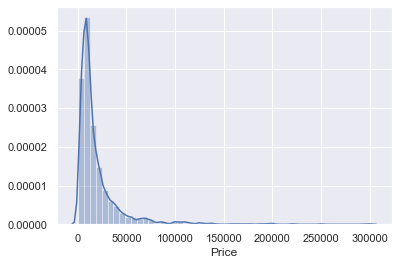

In [396]:
sns.distplot(data_no_mv['Price'])

In [397]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price'] < q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.00,3984,3984.00,3984.00,3984,3984,3984.00
unique,7,nan,6,nan,nan,4,2,nan
top,Volkswagen,nan,sedan,nan,nan,Diesel,yes,nan
freq,880,nan,1528,nan,nan,1853,3613,nan
mean,NaN,17837.12,NaN,165.12,2.74,NaN,NaN,2006.29
std,NaN,18976.27,NaN,102.77,4.96,NaN,NaN,6.67
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,6980.00,NaN,93.00,1.80,NaN,NaN,2002.75
50%,NaN,11400.00,NaN,160.00,2.20,NaN,NaN,2007.00
75%,NaN,21000.00,NaN,230.00,3.00,NaN,NaN,2011.00


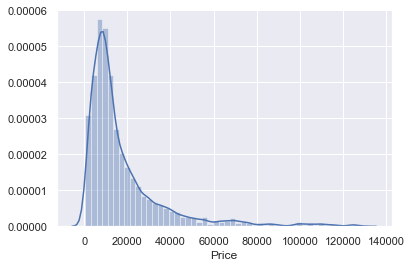

In [398]:
sns.distplot(data_1['Price'])

#### Mileage


Mielage seems to also have outliers that will need to be dealt with

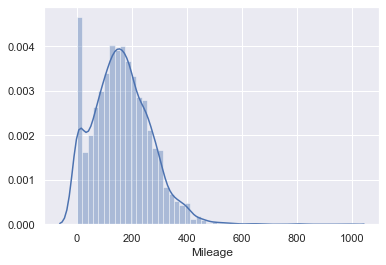

In [399]:
sns.distplot(data_no_mv['Mileage'])

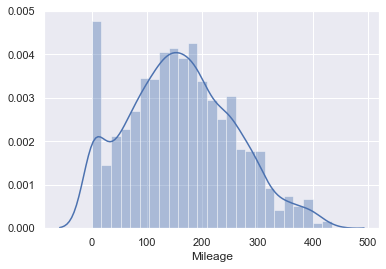

In [400]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage'] < q]
sns.distplot(data_2['Mileage'])

#### Engine Volume


A quick google search shows that engine volume larger than 6.5 is a strange number, it should lie somewhere between 0.6 - 6.5. Looks like we have incorrect entries we will need to deal with. 

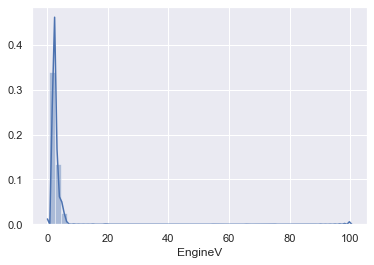

In [401]:
sns.distplot(data_no_mv['EngineV'])

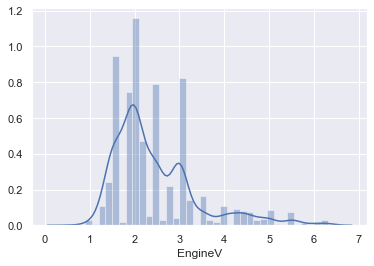

In [402]:
data_3 = data_2[data_2['EngineV'] < 6.5]
sns.distplot(data_3['EngineV'])

#### Year

Year seems to have outliers on the low end, we will use the same approach as the others here as well and remove them

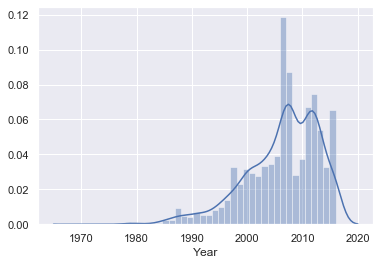

In [403]:
sns.distplot(data_no_mv['Year'])

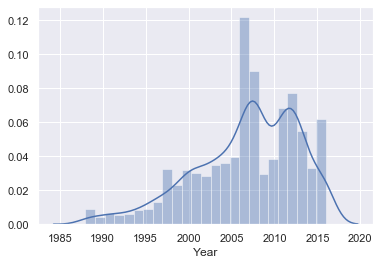

In [404]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year'] > q]
sns.distplot(data_4['Year'])

In [405]:
data_cleaned = data_4.reset_index(drop=True)

In [406]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.00,3867,3867.00,3867.00,3867,3867,3867.00
unique,7,nan,6,nan,nan,4,2,nan
top,Volkswagen,nan,sedan,nan,nan,Diesel,yes,nan
freq,848,nan,1467,nan,nan,1807,3505,nan
mean,NaN,18194.46,NaN,160.54,2.45,NaN,NaN,2006.71
std,NaN,19085.86,NaN,95.63,0.95,NaN,NaN,6.10
min,NaN,800.00,NaN,0.00,0.60,NaN,NaN,1988.00
25%,NaN,7200.00,NaN,91.00,1.80,NaN,NaN,2003.00
50%,NaN,11700.00,NaN,157.00,2.20,NaN,NaN,2008.00
75%,NaN,21700.00,NaN,225.00,3.00,NaN,NaN,2012.00


### Checking the OLS Assumptions

We will have to transform the data such that there is a linear relationship between the features, this will be done using log transformation.

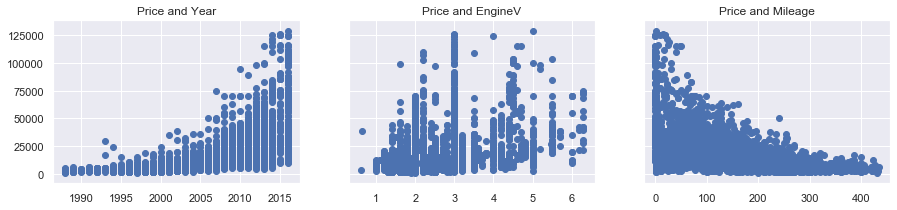

In [407]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15, 3))

ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')

ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price and EngineV')

ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

### Relaxing the Assumptions

In [408]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,8.34
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,8.97
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,9.50
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,10.04
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,9.81
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.00,van,163,2.50,Diesel,yes,2008,9.35
3863,Toyota,17900.00,sedan,35,1.60,Petrol,yes,2014,9.79
3864,Mercedes-Benz,125000.00,sedan,9,3.00,Diesel,yes,2014,11.74
3865,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999,8.78


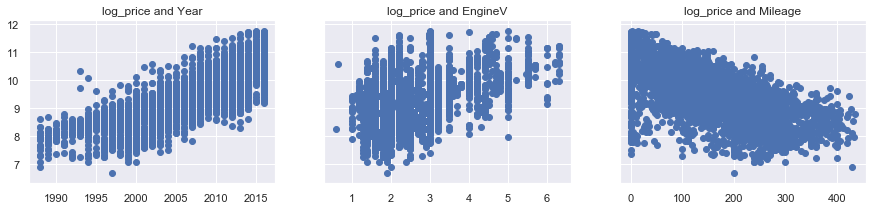

In [409]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15, 3))

ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('log_price and Year')

ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax2.set_title('log_price and EngineV')

ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax3.set_title('log_price and Mileage')

plt.show()

In [410]:
data_cleaned = data_cleaned.drop(['Price'], axis=1)

### Multicolinearity

Year seems to have too high of a VIF as such I will be removing only year and leaving the rest

In [411]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_cleaned[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif

,VIF,features
0,3.79,Mileage
1,10.35,Year
2,7.66,EngineV


In [412]:
data_no_multicolinearity = data_cleaned.drop(['Year'], axis=1)

### Creating dummy variables

In [413]:
data_with_dummies = pd.get_dummies(data_no_multicolinearity, drop_first=True)

In [414]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.00,8.34,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.90,8.97,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.00,9.50,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.20,10.04,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.00,9.81,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Rearranging

In [418]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [419]:
cols = ['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [420]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.00,8.34,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.90,8.97,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.00,9.50,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.20,10.04,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.00,9.81,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Linear Regression Model

In [421]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis=1)

In [422]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [451]:
input_scaled = scaler.transform(inputs)

In [452]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(input_scaled, targets, test_size=0.2, random_state=80)

In [453]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [454]:
y_hat = reg.predict(x_train)

The results are not perfect but they are not random.

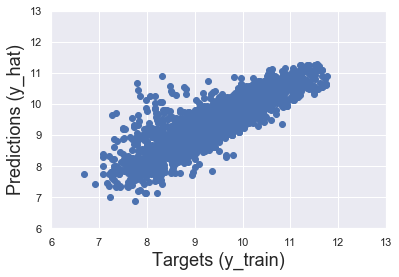

In [455]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size=18)
plt.ylabel("Predictions (y_hat)", size=18)
plt.xlim(6, 13)
plt.ylim(6, 13)
plt.show()

The results seems to be normally distributed but there is a long tail on the left. Which means some of the results are underestimating the target as such we can use this to better our model.

Text(0.5, 1.0, 'Residuals PDF')

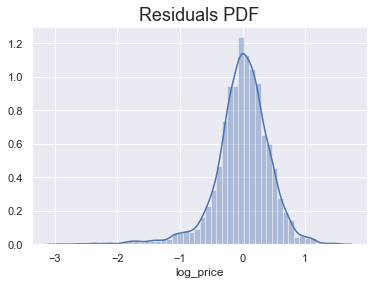

In [456]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

In [457]:
reg.score(x_train, y_train)

0.7541510535661808

## Testing

In [458]:
y_hat_test = reg.predict(x_test)

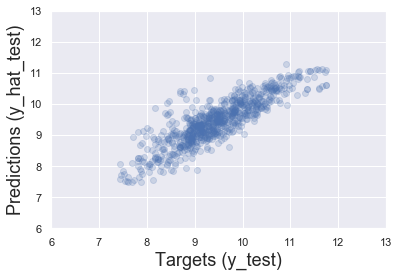

In [459]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)', size=18)
plt.ylabel("Predictions (y_hat_test)", size=18)
plt.xlim(6, 13)
plt.ylim(6, 13)
plt.show()

In [460]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Predictions'])
df_pf.head()

,Predictions
0,4853.98
1,9009.29
2,12193.29
3,12866.24
4,15109.76


In [461]:
y_test = y_test.reset_index(drop=True)
df_pf['Targets'] = np.exp(y_test)
df_pf

,Predictions,Targets
0,4853.98,9000.00
1,9009.29,12800.00
2,12193.29,17499.00
3,12866.24,19900.00
4,15109.76,13200.00
5,7522.53,3400.00
6,17787.84,16700.00
7,8801.92,11800.00
8,17263.97,14899.00
9,3784.34,2500.00


In [462]:
df_pf['Residual'] = df_pf['Targets'] - df_pf['Predictions']
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Targets']*100)

In [463]:
df_pf.describe()

,Predictions,Targets,Residual,Difference%
count,774.00,774.00,774.00,774.00
mean,16346.48,18167.50,1821.02,36.22
std,12523.14,18949.66,10991.30,53.56
min,1764.68,1700.00,-39624.42,0.05
25%,7971.92,7500.00,-2387.09,11.31
50%,12373.08,11850.00,327.50,24.34
75%,20808.66,21251.25,3528.98,41.46
max,78422.21,125000.00,84544.81,459.49


In [464]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Predictions,Targets,Residual,Difference%
485,42477.42,42500.00,22.58,0.05
352,3148.13,3150.00,1.87,0.06
654,13012.33,13000.00,-12.33,0.09
559,7278.97,7300.00,21.03,0.29
622,30602.51,30500.00,-102.51,0.34
374,10740.70,10800.00,59.30,0.55
670,38041.47,38300.00,258.53,0.68
171,13006.64,12900.00,-106.64,0.83
101,10611.31,10700.00,88.69,0.83
738,7437.83,7500.00,62.17,0.83


Analyzing the results of this regression, I came to the conclusion that this model is missing a key information that is causing particular vechiles to be overestimated. Such as the Model which we dropped or more likely the condition of the vehicle specifically if it was damaged.